In [1]:
import data
import training

In [2]:
csvPath='/Users/pablo/Desktop/simpleSmaStrategy/priceData.csv'
apiKey=''
# only needs to be called once
# data.storeData(csvPath,apiKey)

In [3]:
import pandas as pd

df=pd.read_csv(csvPath,index_col=0)

In [4]:
trainingResults=training.train(df,.5,100000)

In [5]:
summary=training.summarizeTraining(trainingResults,df)

In [6]:
summary.sort_values('sharpe',ascending=False)

,short_sma,long_sma,percent_short,annualized_return,annualized_volatility,sharpe
17,5,25,0.9,2.320048,0.872952,2.657702
422,15,25,0.9,2.300259,0.875585,2.627110
8,5,20,0.9,2.247043,0.873057,2.573765
35,5,35,0.9,2.265319,0.885573,2.558026
26,5,30,0.9,2.237894,0.883249,2.533707
...,...,...,...,...,...,...
467,15,50,0.9,1.592814,0.897856,1.774019
485,15,60,0.9,1.594953,0.899089,1.773966
475,15,55,0.8,1.575550,0.888730,1.772810
395,13,55,0.9,1.575298,0.898857,1.752556


In [7]:
benchmarkDates=trainingResults[0]['resultFrame'].date.copy()
benchmark=training.getBenchmark(benchmarkDates,df)
benchmark

{'shortSma': 0,
 'longSma': 0,
 'percentShort': 0,
 'resultFrame':            date       btc         eth
 0    2019-06-23  4.584603  162.064048
 1    2019-06-24  4.584603  162.064048
 2    2019-06-25  4.584603  162.064048
 3    2019-06-26  4.584603  162.064048
 4    2019-06-27  4.584603  162.064048
 ..          ...       ...         ...
 435  2020-08-31  4.584603  162.064048
 436  2020-09-01  4.584603  162.064048
 437  2020-09-02  4.584603  162.064048
 438  2020-09-03  4.584603  162.064048
 439  2020-09-04  4.584603  162.064048
 
 [440 rows x 3 columns],
 'portfolioFrame':            date  portfolio_value  perc_return
 1    2019-06-24    101195.714255     0.011957
 2    2019-06-25    105772.452699     0.045227
 3    2019-06-26    115032.790425     0.087550
 4    2019-06-27    100295.313490    -0.128115
 5    2019-06-28    107261.986130     0.069462
 ..          ...              ...          ...
 435  2020-08-31    123710.140427     0.004086
 436  2020-09-01    131702.746354     0.06460

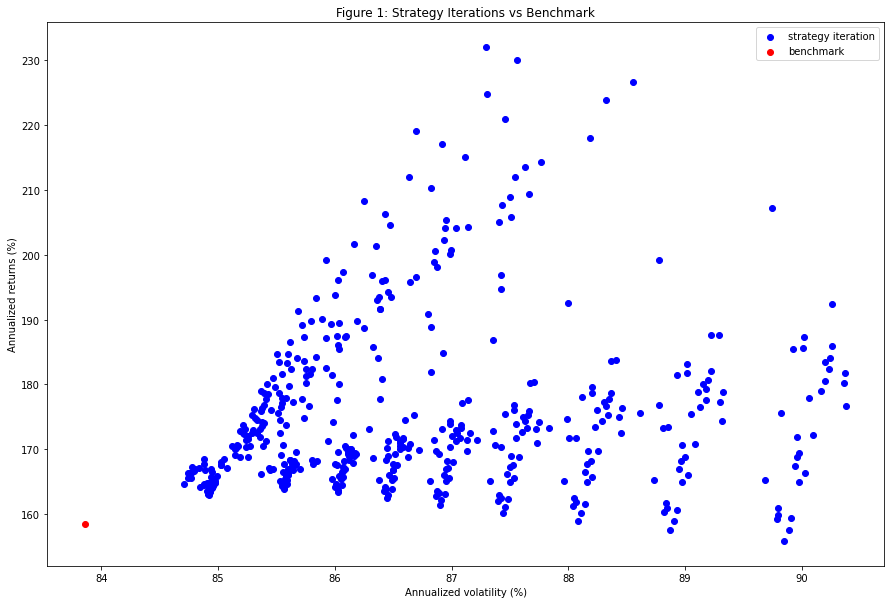

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.scatter(summary.annualized_volatility*100,summary.annualized_return*100,color='blue',label='strategy iteration')
plt.scatter([benchmark['annualizedVolatility']*100],[benchmark['annualizedReturn']*100],color='red',label='benchmark')
plt.legend()
plt.xlabel('Annualized volatility (%)')
plt.ylabel('Annualized returns (%)')
_=plt.title('Figure 1: Strategy Iterations vs Benchmark')

In [9]:
benchmarkSharpe=benchmark['annualizedReturn']/benchmark['annualizedVolatility']
benchmarkSharpe

1.8908950189642486

In [10]:
summary.sharpe.mean()

2.0224005904959443

In [11]:
higherSharpeThanBenchmark=len(summary[summary.sharpe>benchmarkSharpe])/len(summary)
higherSharpeThanBenchmark

0.9012345679012346

In [12]:
summary.annualized_return.min()

1.5587312040806791

In [13]:
summary.annualized_return.max()

2.3200476306914655

In [14]:
summary.annualized_return.mean()

1.7535234491983385

In [15]:
higherReturnThanBenchmark=len(summary[summary.annualized_return>benchmark['annualizedReturn']])/len(summary)
higherReturnThanBenchmark

0.9938271604938271

In [16]:
summary.annualized_volatility.min()

0.8470918397493876

In [17]:
summary.annualized_volatility.max()

0.9037938746286073

In [18]:
summary.annualized_volatility.mean()

0.8671095617114396